In [1]:
# project: p2
# submitter: bli378
# partner: none
# hours: 10

In [2]:
import loans
import search
bank = loans.Bank("First Home Bank")

In [3]:
#q1
number = 0
counter = 0
for loan in bank.list:
    if loan.interest_rate > 0:
        number += loan.interest_rate
        counter += 1
number / counter

2.962962962962963

In [4]:
#q2
number = 0
counter = 0
for loan in bank.list:
    number += len(loan.applicants)
    counter += 1
number / counter

1.5777777777777777

In [5]:
#q3
ages = {}
for loan in bank.list:
    for person in loan.applicants:
        if person.age in ages:
            ages[person.age] += 1
        else:
            ages[person.age] = 1
ages

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
tree = search.BST()
for loan in bank.list:
    tree.add(loan.interest_rate, loan)

In [7]:
#q4
len(tree[-1])

18

In [8]:
#q5
def height(node):
    if node is None:
        return 0
    return 1 + max(height(node.left), height(node.right))
height(tree.root)

9

In [9]:
bank = loans.Bank("University of Wisconsin Credit Union")

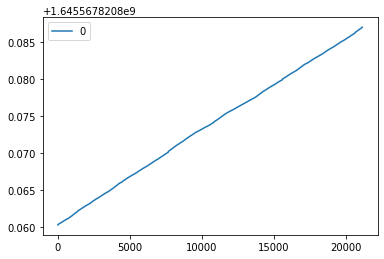

In [10]:
#q6
import time
import pandas as pd
tree = search.BST()
times = []
times.append(time.time())
for loan in bank.list:
    tree.add(loan.interest_rate, loan)
    times.append(time.time())
df = pd.DataFrame(times)
plot = df.plot.line()

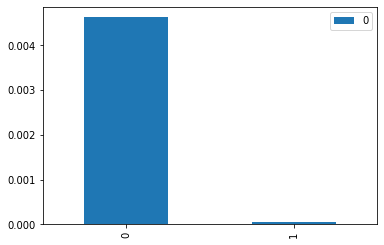

In [11]:
#q7
times = []
start = time.time()
counter = 0
for loan in bank.list:
    if loan.interest_rate == -1:
        counter+=1
end = time.time()
times.append(end - start)
start = time.time()
len(tree[-1])
end = time.time()
times.append(end - start)
df = pd.DataFrame(times)
plot = df.plot.bar()

Text(0, 0.5, 'amount')

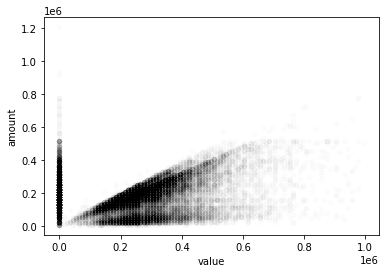

In [12]:
#q8
property_values = []
loan_amounts = []
for loan in bank.list:
    if loan.property_value <= 1000000:
        property_values.append(loan.property_value)
        loan_amounts.append(loan.loan_amount)
df = pd.DataFrame()
df["property_values"] = property_values
df["loan_amounts"] = loan_amounts
plot = df.plot.scatter(x="property_values",y="loan_amounts",color="black",alpha=0.01)
plot.set_xlabel("value")
plot.set_ylabel("amount")

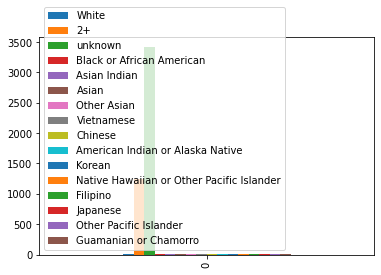

In [13]:
#q9
races = {}
for loan in bank.list:
    for person in loan.applicants:
        if len(person.race) == 1:
            race = list(person.race).pop()
            if person.race in [races]:
                races[race] += 1
            else:
                races[race] = 1
        elif len(person.race) == 0:
            if "unknown" in races:
                races["unknown"] += 1
            else:
                races["unknown"] = 1
        else:
            if "2+" in races:
                races["2+"] += 1
            else:
                races["2+"] = 1
races
df = pd.DataFrame(races, index=[0])
plot = df.plot.bar()

In [14]:
#q10
def count_nodes(node):
    if node is None:
        return 0
    return 1 + count_nodes(node.left) + count_nodes(node.right)
count_nodes(tree.root)

32